C:\Users\Ashmita\AppData\Local\Temp\ipykernel_19124\1480382307.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


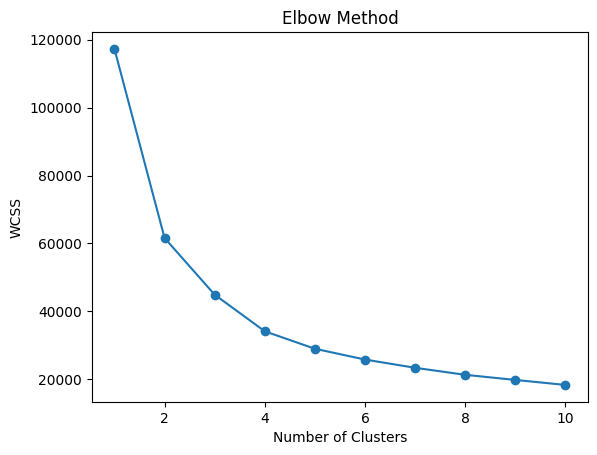

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
# Load your soil data
soil_data = pd.read_csv('../datasets/veris_proj.csv')

# Select relevant soil variables
X = soil_data[['F3', 'F4', 'F5']]

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [29]:
plt.savefig('elbow_method_plot.png')

<Figure size 640x480 with 0 Axes>

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
soil_data = pd.read_csv('../datasets/veris_proj.csv')
X = soil_data[['F3', 'F4', 'F5']]
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
# Get the cluster labels
y = kmeans.labels_

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
unique_labels = kmeans.labels_
# Save the labels in DataFrame
soil_data['Cluster_Labels'] = unique_labels
print("Unique Labels:", set(unique_labels))
# Save the data to a new CSV file
soil_data.to_csv('soil_data_with_cluster_two_labels.csv', index=False)


Unique Labels: {0, 1}


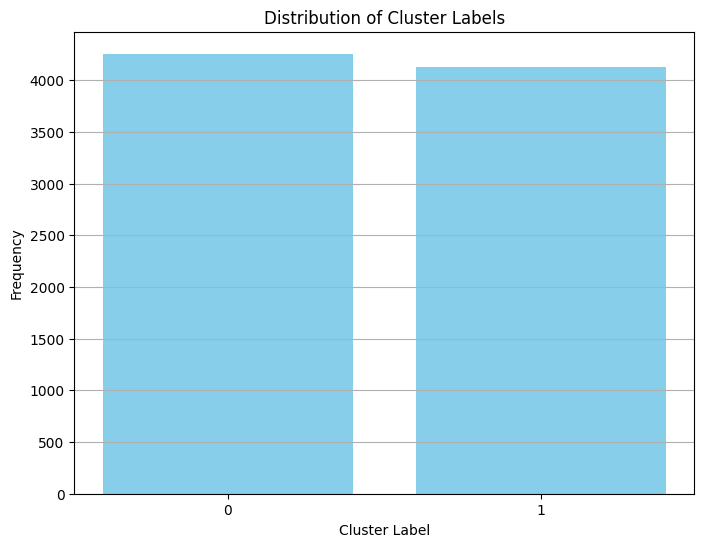

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cluster_labels = kmeans.labels_
label_counts = pd.Series(cluster_labels).value_counts().sort_index()
# Plot the distribution of cluster labels
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.title('Distribution of Cluster Labels')
plt.xticks(label_counts.index)
plt.grid(axis='y')
plt.show()


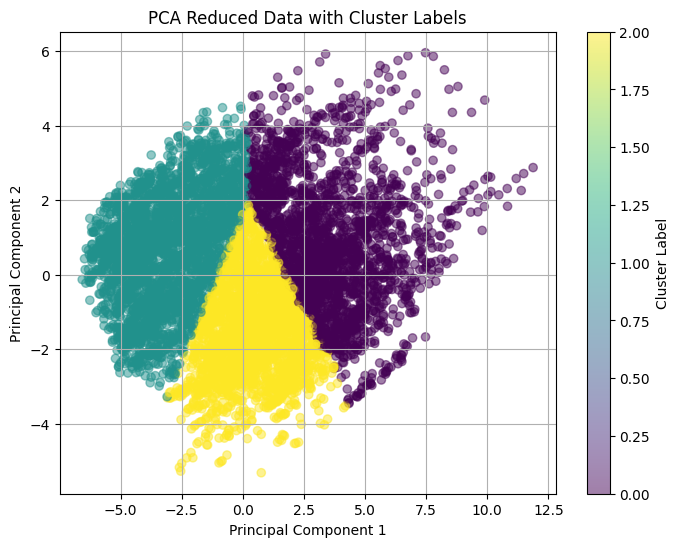

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Fit PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Visualize the reduced data in a 2D plot
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=soil_data['Cluster_Labels'], cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Reduced Data with Cluster Labels')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()
